
#**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2024**

---
## Trabajo práctico entregable - Parte 1
---
###Grupo de Trabajo 31
**Integrantes del Grupo:**

Belen Franzoni

Belen Marzola

Guadalupe Peñaranda

Hisam Abou Faker

Marcelo Puiatti

**Tutora:**
*Yihara Isabel Mejia*



## **1) Configuración del Entorno**
##Importo librerias que voy a utilizar a lo largo del trabajo

In [57]:
# @title

import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset


In [58]:
#Traigo de Github, del repositorio de la materia, el archivo con los datos que voy a utilizar.
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
df = pd.read_csv(url)

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 100000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

## Respuesta

### 1. ¿Cuáles son los lenguajes de programación asociados a los mejores salarios?

Para responder esta consigna, seleccionaremos 2 columnas del dataset:

1.   Lenguajes de Programación "*tools_programming_languages*"
2.   Salario Mensual Bruto "*salary_monthly_BRUTO*"

En el siguiente cuadro se muestran las primeras y las últimas 5 entradas de la encuesta correspondiente a estas secciones:



In [59]:
# @title
#  Seleccionaremos 2 columnas del dataset:
#  Salario Mensual BRUTO "salary_monthly_BRUTO"
#  Lenguajes de Programación "tools_programming_languages"

relevant_columns = ['tools_programming_languages', 'salary_monthly_BRUTO']
Poblacion = len(df)

# En el siguiente cuadro se muestran las primeras y las últimas 5 entradas
# de la encuesta correspondiente a estas secciones:
df[relevant_columns]

,tools_programming_languages,salary_monthly_BRUTO
0,"Bash/Shell, Python",680000.0
1,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",650000.0
2,"SQL, Oracle APEX, PL-SQL, SQL Developer",125000.0
3,ABAP,190000.0
4,Java,250000.0
...,...,...
5800,".NET, C#, SQL",327000.0
5801,"HTML, Java, Javascript, PHP, Python, SQL, Type...",620000.0
5802,"Java, Javascript, SQL",1500000.0
5803,"Java, SQL",690000.0


### La base de datos presenta 5805 entradas

*Tras un análisis de las entradas en la columna de los salarios mensuales encontramos:

1.   Entradas sin números Nan (Not a number)
2.   Entradas con salarios extremadamente bajos (0, ó menores a 10.000)
3.   Entradas con salarios extremadamente altos

En la siguiente celda presentamos información que respalda este análisis:

In [60]:
# @title
salary_col='salary_monthly_BRUTO'

# Contamos el número total de entradas:
print("Número de entradas en la encuesta:")
print(len(df))

# Buscamos los valores más altos y más bajos
highest_value_column_df = df[salary_col].max()
lowest_value_column_df =  df[salary_col].min()

# Representamos estos valores
print("\nSalarios más altos presentados en la encuesta:")
print(highest_value_column_df)

print("\nSalarios más bajos presentados en la encuesta:")
print(lowest_value_column_df)

# Buscamos la cantidad de entradas nulas
# Count the number of NaN values in the 'salary_monthly_BRUTO' column
nan_count = df['salary_monthly_BRUTO'].isna().sum()

print("\nNúmero de respuestas sin valores (NaN) en la columna 'salary_monthly_BRUTO':", nan_count)

#
print("\nParámetros Estadísticos obtenidos a partir de la Encuesta")
print("Salarios Netos Mensuales\n")
df.salary_monthly_BRUTO.describe().apply("{0:.2f}".format)


Número de entradas en la encuesta:
5805

Salarios más altos presentados en la encuesta:
45000000.0

Salarios más bajos presentados en la encuesta:
1.0

Número de respuestas sin valores (NaN) en la columna 'salary_monthly_BRUTO': 0

Parámetros Estadísticos obtenidos a partir de la Encuesta
Salarios Netos Mensuales



count        5805.00
mean       694162.64
std        952623.76
min             1.00
25%        297145.00
50%        493000.00
75%        800000.00
max      45000000.00
Name: salary_monthly_BRUTO, dtype: object

### Limpieza de datos

Realizaremos la limpieza de datos de la columna con información sobre salarios netos, eliminando entradas sin números, valores muy bajos y valores extremadamente altos.
Fijaremos como límite inferior \$10.000 y límite superior \$4.000.000.
Estos límites pueden ser modificados, editando los campos en el formulario.
Luego de esta limpieza la nueva base de datos tendrá menos datos
Los Histogramas muestran la distribución de los salarios para estos dos conjuntos.


In [61]:
#@title **Limpieza de entradas de la columna Salarios Brutos**
#@markdown Ingrese un valor mínimo de porcentaje sobre el **N** total de la muestra **< QuartilMin >** para salarios Netos aceptados.
#@markdown
#@markdown Ingrese valores máximo de porcentaje sobre el **N** total de la muestra **< QuartilMax >** para salarios Netos aceptados.
#@markdown Sugerimos valores de **2** y **98**.

QuartilMin = 2 # @param {type:"slider", min:0, max:50, step:0.5}
QuartilMax = 98 # @param {type:"slider", min:51, max:100, step:0.5}

Q1_rate= QuartilMin / 100
print(Q1_rate)
Q3_rate= QuartilMax / 100
print(Q3_rate)

0.02
0.98


In [62]:
# @title Descripcion de los resultados del análisis de Datos, tras la limpieza inicial


Q1 = df[salary_col].quantile(Q1_rate)
Q3 = df[salary_col].quantile(Q3_rate)
IQR = Q3 - Q1
df_filtered = df[~((df[salary_col]<(Q1))|(df[salary_col]>(Q3)))]


print('Q1: {} ::: Q3: {}'.format(int(Q1),int(Q3)))
print("Número Total de Entradas quitando outliers: ", df_filtered.shape)


##Cuento los valores con NaN
nan_count = df['salary_monthly_BRUTO'].isna().sum()
print(nan_count)

nan_count_1 = df_filtered['salary_monthly_BRUTO'].isna().sum()
print(nan_count_1)


Q1: 304 ::: Q3: 3000000
Número Total de Entradas quitando outliers:  (5584, 43)
0
0


In [63]:
# @title Descripcion de los resultados del análisis de Datos, tras la limpieza inicial


Q1 = df[salary_col].quantile(Q1_rate)
Q3 = df[salary_col].quantile(Q3_rate)
IQR = Q3 - Q1
filtered_df_no_nan = df[~((df[salary_col]<(Q1))|(df[salary_col]>(Q3)))]


print('Q1: {} ::: Q3: {}'.format(int(Q1),int(Q3)))
print("Número Total de Entradas quitando outliers: ", df_filtered.shape)


# Contamos el número total de entradas:
print("Número de entradas en la Tabla Filtrada:")
print(len(filtered_df_no_nan))

# Buscamos los valores más altos y más bajos
highest_value_column_df_2 = filtered_df_no_nan[salary_col].max()
lowest_value_column_df_2 =  filtered_df_no_nan[salary_col].min()

# Representamos estos valores
print("\nSalarios más altos presentados en la encuesta:")
print(highest_value_column_df_2)

print("\nSalarios más bajos presentados en la encuesta:")
print(lowest_value_column_df_2)

# Buscamos la cantidad de entradas nulas
# Count the number of NaN values in the 'salary_monthly_BRUTO' column
nan_count_2 = filtered_df_no_nan['salary_monthly_BRUTO'].isna().sum()

print("\nNúmero de respuestas sin valores (NaN) en la columna 'salary_monthly_BRUTO':", nan_count_2)

print("\nParámetros Estadísticos obtenidos a partir del Análisis de la Tabla Filtrada")
print("Salarios BRUTOS Mensuales\n")
#

filtered_df_no_nan.salary_monthly_BRUTO.describe().apply("{0:.2f}".format)

Q1: 304 ::: Q3: 3000000
Número Total de Entradas quitando outliers:  (5584, 43)
Número de entradas en la Tabla Filtrada:
5584

Salarios más altos presentados en la encuesta:
3000000.0

Salarios más bajos presentados en la encuesta:
308.0

Número de respuestas sin valores (NaN) en la columna 'salary_monthly_BRUTO': 0

Parámetros Estadísticos obtenidos a partir del Análisis de la Tabla Filtrada
Salarios BRUTOS Mensuales



count       5584.00
mean      631938.66
std       516297.14
min          308.00
25%       300000.00
50%       495000.00
75%       800000.00
max      3000000.00
Name: salary_monthly_BRUTO, dtype: object

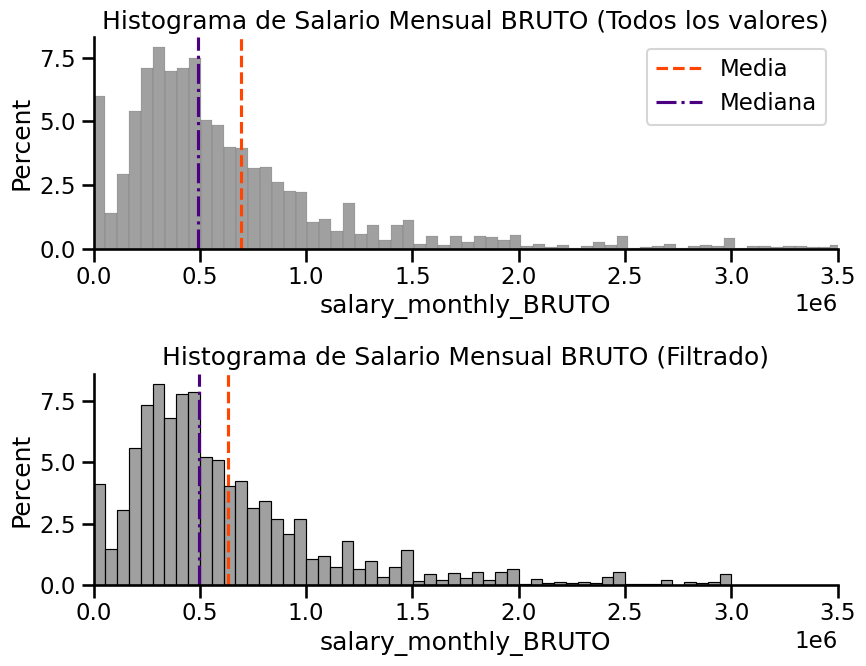

In [64]:

# @title Histogramas de los valores de "Salario Mensual BRUTO" del análisis de Datos
# @markdown
# @markdown Comparación de la Distribución de los Salarios
# @markdown


## La diferencia no siempre se aprecia en los gráficos
fig, axes = plt.subplots(nrows=2, figsize=(9, 7))

#filtered_df = df[df[salary_col] < 2000000]
seaborn.histplot(df[salary_col], bins = "auto", ax=axes[0], color='gray',  stat = "percent")
axes[0].axvline(df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[0].set_xlim(0, 3500000)
axes[0].set_title('Histograma de Salario Mensual BRUTO (Todos los valores)')
axes[0].legend(loc='upper right')  # Add legend box at upper right corner



seaborn.histplot(filtered_df_no_nan[salary_col], bins= "auto", ax=axes[1], color='gray',  stat = "percent")
axes[1].axvline(filtered_df_no_nan[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(filtered_df_no_nan[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[1].set_xlim(0, 3500000)
axes[1].set_title('Histograma de Salario Mensual BRUTO (Filtrado)')

#axes[0].legend()

seaborn.despine()
plt.subplots_adjust(hspace=0.8)  # Adjust vertical spacing between subplots
plt.tight_layout()
plt.show()

# Lenguajes de Programación

A continuación trabajeros la otra sección de la Tabla, que incluye los Lenguajes de Programación.

## **Conteo de frecuencias de los lenguajes de programación**


La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son 'strings' con los lenguajes seleccionados separados por comas. A continuación se muestra las primeras celdas de esta tabla.



In [65]:
# Convert the comma-separated string of languages to a list of strings.
# Remove 'ninguno de los anteriores' option, spaces, and trailing commas.
def split_languages(languages_str):
    if not isinstance(languages_str, str):
        return []
    # Remove 'other' option
    languages_str = languages_str.lower().replace('ninguno de los anteriores', '')
    # Split string into list of items
    # Remove spaces and commas for each item
    return [lang.strip().replace(',', '') for lang in languages_str.split()]

# Create a new column with the list of languages
filtered_df_no_nan.loc[:, 'cured_programming_languages'] = filtered_df_no_nan.tools_programming_languages.apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages')

# Duplicate each row of df for each programming language mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate unnecessary information.
df_lang = filtered_df_no_nan.cured_programming_languages.apply(pd.Series).stack().reset_index(level=-1, drop=True).to_frame()\
    .join(filtered_df_no_nan[relevant_columns]).rename(columns={0: 'programming_language'})

# Display the first 15 rows of the resulting DataFrame
print(df_lang[:15])


<ipython-input-65-1aaef95da814>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_no_nan.loc[:, 'cured_programming_languages'] = filtered_df_no_nan.tools_programming_languages.apply(split_languages)


  programming_language                        tools_programming_languages  \
0           bash/shell                                 Bash/Shell, Python   
0               python                                 Bash/Shell, Python   
1           bash/shell  Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...   
1                  css  Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...   
1                 html  Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...   
1           javascript  Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...   
1                  php  Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...   
1                  sql  Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...   
1           typescript  Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...   
1                  vba  Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...   
2                  sql            SQL, Oracle APEX, PL-SQL, SQL Developer   
2               oracle            SQL, Oracle APEX, PL-SQL, SQL Developer   

En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay dos filas con índice 0 y 8 filas con índice 1.

Se refiere a que si la persona nombra N tipos de lenguaje (python,java,etc), esa misma fila se replica N veces. Veamos, la primera persona puso dos lenguajes: bash/shell y python. Entonces divide esa fila en dos filas. Por eso aparece bash/shell y python con el mismo indice 0.

In [66]:
# @title En la Tabla mostrada a Continuación se muestra una lista con los 10 lenguajes más "populares"
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'programming_language': 'language','count': 'frequency',})
language_count[:10]

#problemas con renombrar columnas, es distinto del Colab.
#en colab tengo que decirle que "programming-language" = "language"


,language,frequency
0,sql,2428
1,javascript,2187
2,html,1578
3,python,1556
4,css,1063
5,java,1040
6,typescript,1008
7,bash/shell,863
8,.net,669
9,php,649


**Sobre esto podemos elejir uno de estos gráficos**

<ipython-input-67-1495c70fe407>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  seaborn.boxenplot(x='salary_monthly_BRUTO', y='programming_language', data=df_lang_2, palette=colors, order=interesting_languages)


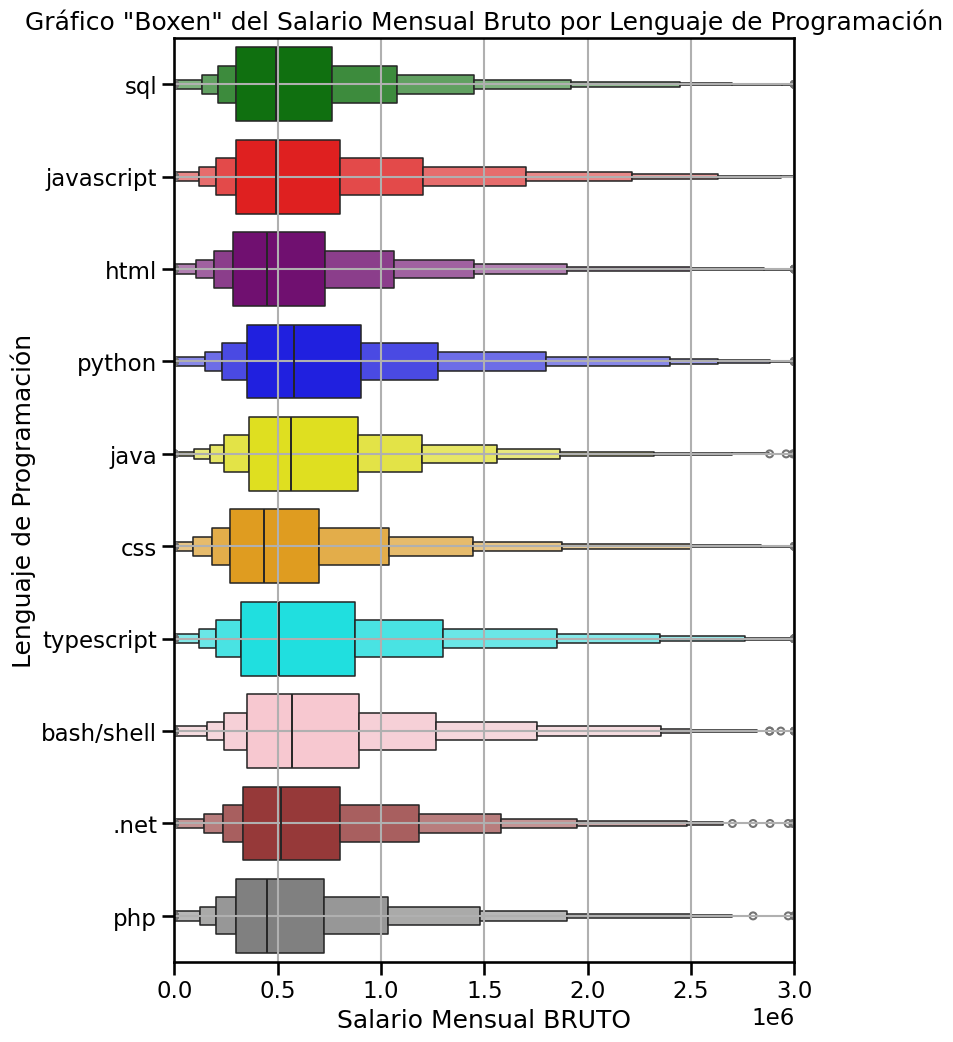

In [67]:
# @title Podemos realizar un gráfico Boxen, comparando la distribución de **salarios Brutos** para estos lenguajes populares:

plt.figure(figsize=(8, 12))
# Filter DataFrame for specific programming languages
interesting_languages = [ "sql", "javascript", "html", "python", "java", "css", "typescript", "bash/shell", ".net", "php"]
df_lang_2 = df_lang[df_lang['programming_language'].isin(interesting_languages)]
colors = {"python": "blue", "sql": "green", "javascript": "red", "html": "purple", "css": "orange",
          "java": "yellow", "typescript": "cyan", "bash/shell": "pink", ".net": "brown", "php": "gray"}

# Reset index to avoid duplicate labels
df_lang_2.reset_index(drop=True, inplace=True)

# Create box plot
seaborn.boxenplot(x='salary_monthly_BRUTO', y='programming_language', data=df_lang_2, palette=colors, order=interesting_languages)

# Set plot title and labels

plt.title('Gráfico "Boxen" del Salario Mensual Bruto por Lenguaje de Programación')
plt.xlabel('Salario Mensual BRUTO')
plt.ylabel('Lenguaje de Programación')
plt.xlim(0, 3000000)
plt.grid()
# Show plot
plt.show()

# Resultados
## Iteración 1
De acuerdo a esta lista parecería que Python, Bash/Shell y Java serían los lenguajes asociados a los mejores salarios, pero estarían muy cerca de la media

## Iteración 2
Podríamos plantear una nueva hipótesis, quizás tengan conocimientos sobre lenguajes menos difundidos, o menos populares puedan darle más valor a este conocimiento *"**Unico**"*.
A partir del análisis de los gráficos y de la Tabla de Frecuencia de Lenguajes, los lenguajes más populares **SQL** y **Javascript** no presentan las medias ,más altas.


In [68]:
# @title Podemos hacer una lista de lenguajes más populares, considerando que la población de "*respuestas válidas*"" es ~5580 programadores. Podemos seleccionar el límite arbitrario para nuestra lista: seleccionar los mas populares: que lo usen mas de *n* personas (frequency>*n*)
# @markdown Asignar un límite para el corte entre los lenguajes a considerar para próximos análisis y los que no.
# @markdown Indicar el valor de la variable **Lang_lim**:

Lang_lim = 50 # @param {type:"slider", min:0, max:1000, step:5}

condicion = language_count['frequency'] > Lang_lim
#renombro mi data frame como populares
language_count_popu = language_count[condicion]

#me muestra mi data frame
language_count_popu  #Opcional imprimir esta tabla

,language,frequency
0,sql,2428
1,javascript,2187
2,html,1578
3,python,1556
4,css,1063
5,java,1040
6,typescript,1008
7,bash/shell,863
8,.net,669
9,php,649


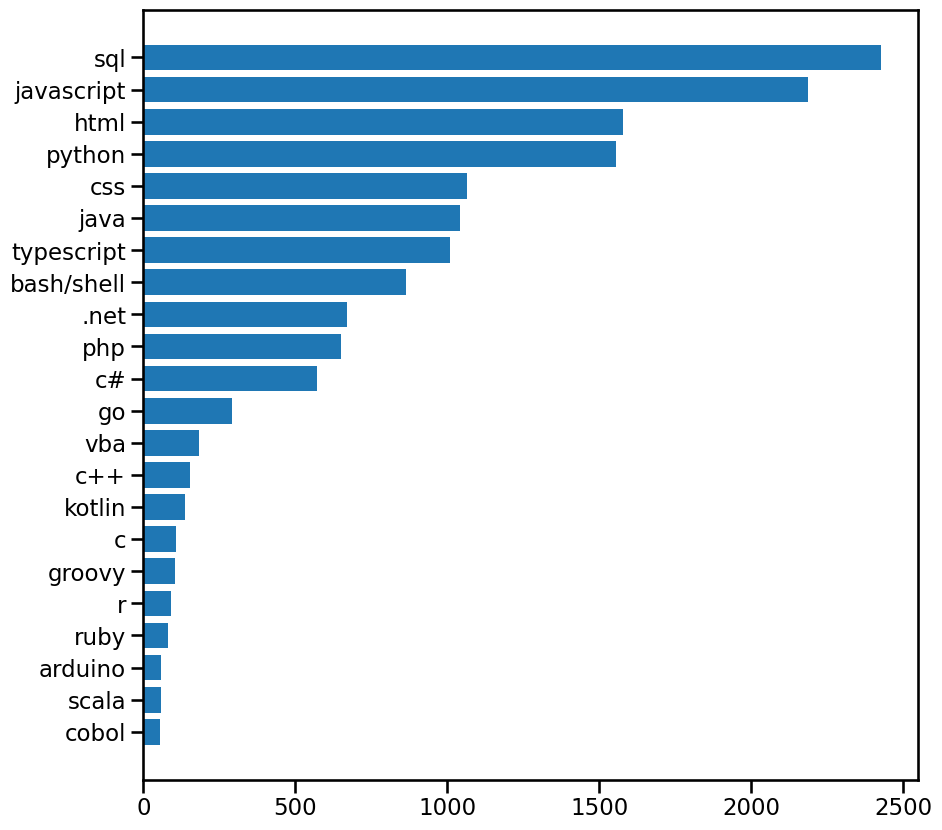

In [69]:
# @title Grafico la frecuencia *vs* los tipos de lenguaje para distinguir los mas populares
fig, ax = plt.subplots(figsize=(10, 10))

#del data frame selecciono en x solo la columna language
# en y la columna frquency
x = language_count_popu.language
y= language_count_popu.frequency

#Dibujo el grafico de barras (bar)
ax.barh(x, width = y)
ax.invert_yaxis()

#Roto unicamente el eje x
#ax.set_xticklabels(x,rotation=90)

#print(language_count_popu.language)

<ipython-input-70-597507c5f36a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x=salaries_by_language.index, y=salaries_by_language.values, palette='viridis')


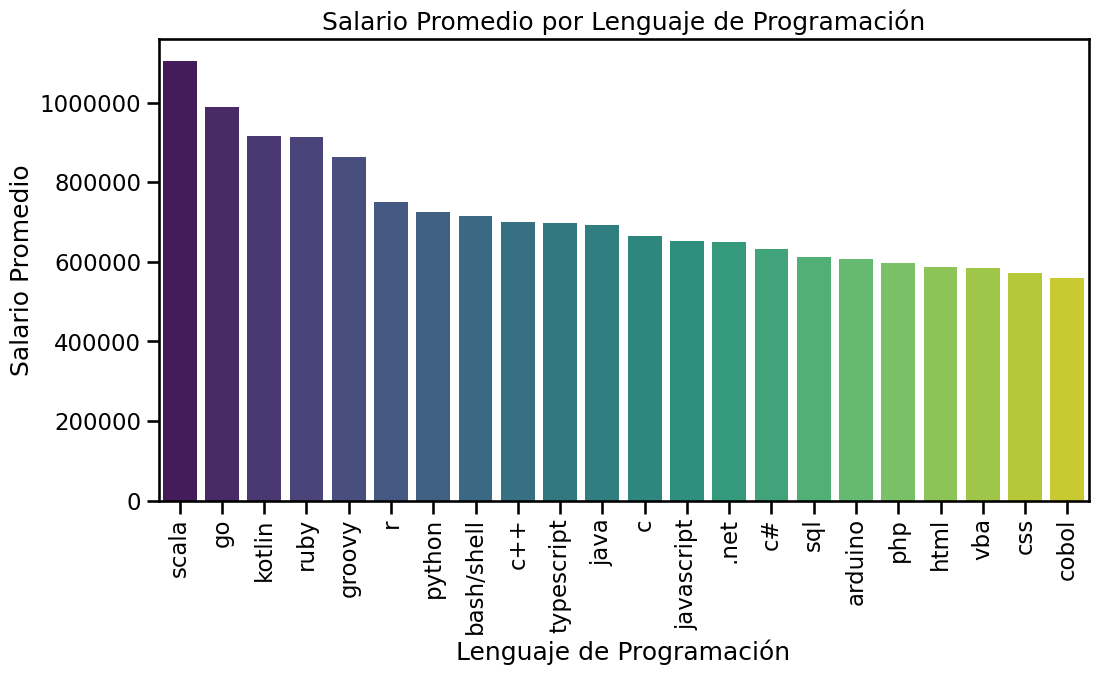

In [70]:
# @title Para relacionar estos lenguajes con los salarios **BRUTO**, realizamos un gráfico de barras
# Group by programming_language and calculate the mean salary_monthly_BRUTO

interesting_languages = language_count_popu['language'].tolist()
df_lang_3 = df_lang[df_lang['programming_language'].isin(interesting_languages)]

salaries_by_language = df_lang_3.groupby('programming_language')['salary_monthly_BRUTO'].mean()
# Sort the grouped data by mean salary values in descending order
salaries_by_language = salaries_by_language.sort_values(ascending=False)

# Plot, este grafico no tiene los lenguajes mas utilizados segun la encuesta, sino los considerados mas interesantes por Hisam
# uso de filtrado por lenguaje
plt.figure(figsize=(12, 6))
seaborn.barplot(x=salaries_by_language.index, y=salaries_by_language.values, palette='viridis')
plt.title('Salario Promedio por Lenguaje de Programación')
plt.xlabel('Lenguaje de Programación')
plt.ylabel('Salario Promedio')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

<ipython-input-71-6e7943c40462>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x=salaries_by_language.index, y=salaries_by_language.values, palette='viridis', order= interesting_languages )


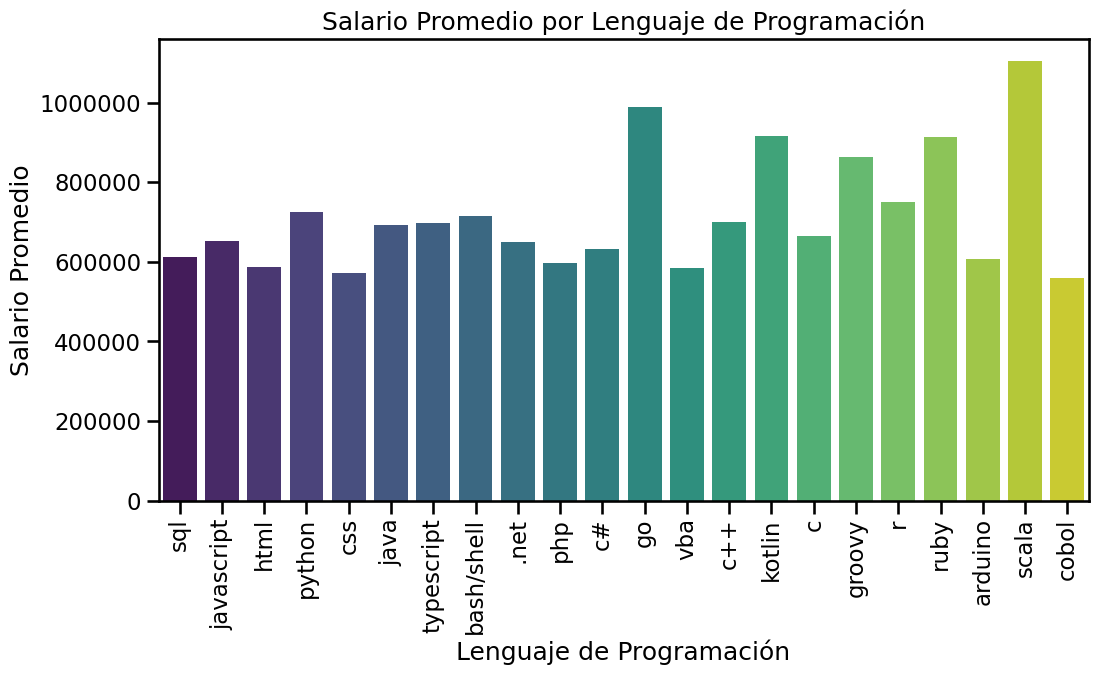

In [71]:
# @title Para terminar de comprender la relación entre lenguajes y salarios **BRUTO**, repetimos el gráfico de barras, pero ahora ordenados de acuerdo a popularidad *decresciente*.

interesting_languages = language_count_popu['language'].tolist()
df_lang_3 = df_lang[df_lang['programming_language'].isin(interesting_languages)]

salaries_by_language = df_lang_3.groupby('programming_language')['salary_monthly_BRUTO'].mean()
# Sort the grouped data by mean salary values in descending order
salaries_by_language = salaries_by_language.sort_values(ascending=False)

# Plot, este grafico no tiene los lenguajes mas utilizados segun la encuesta, sino los considerados mas interesantes por Hisam
# uso de filtrado por lenguaje
plt.figure(figsize=(12, 6))
seaborn.barplot(x=salaries_by_language.index, y=salaries_by_language.values, palette='viridis', order= interesting_languages )
plt.title('Salario Promedio por Lenguaje de Programación')
plt.xlabel('Lenguaje de Programación')
plt.ylabel('Salario Promedio')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Confirmación de la Hipótesis  

Tener conocimientos de algunos lenguajes particulares, *"**Unicos**"*., aumentan las chances de tener un mejor salario Bruto.
De acuerdo a los resultados del análisis, tener conocimientos de lenguajes poco populares como *scala* (1%), *ruby* (1,5%), o *go* (6%) ayudaría a tener mejores salarios Netos, frente a los *"**Populares**"* **SQL** y **Javascript** que no presentan las medias más altas.

# Refuerzo, gráfico final

Proponemos realizar un gráfico de Boxen comparando las distribuciones de **Salario Neto** para 2 **Lenguajes de Programación*, uno *Popular* y otro *Único*.

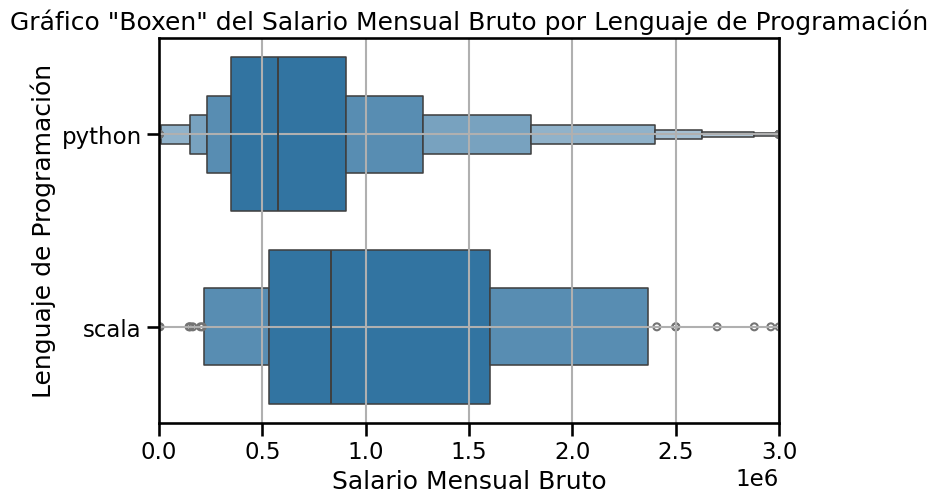

In [72]:
# @title Podemos realizar un gráfico Boxen, comparando la distribución de **salarios Brutos** para estos lenguajes populares:

plt.figure(figsize=(8, 5))
# Filter DataFrame for specific programming languages
Populares = "python" #@param ["sql", "javascript", "html", "python"]

Unicos = "scala" #@param ["scala", "ruby", "go", "kotlin"]

analized_languages = [ Populares, Unicos]
df_lang_final = df_lang[df_lang['programming_language'].isin(analized_languages)]

# Reset index to avoid duplicate labels
df_lang_final.reset_index(drop=True, inplace=True)

# Create box plot
seaborn.boxenplot(x='salary_monthly_BRUTO', y='programming_language', data=df_lang_final)

# Set plot title and labels

plt.title('Gráfico "Boxen" del Salario Mensual Bruto por Lenguaje de Programación')
plt.xlabel('Salario Mensual Bruto')
plt.ylabel('Lenguaje de Programación')
plt.xlim(0, 3000000)
plt.grid()
# Show plot
plt.show()

## <font color='red'>**Creo que hasta acá estaría el punto 1**</font>
### <font color='blue'>*Tomé la idea de las chicas de filtrar también los salarios, pero lo puse antes de filtrar y arreglar la tabla de los lenguajes *</font>

**Definimos las variables hasta el momento para la segunda parte**

filtered_df_no_nan: data frame curado a partir de la columna salario bruto

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones.

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos?

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



Para obtener una idea rápida de si ambas variables están correlacionadas o no, se graficó el salario bruto en función del salario neto. Si se encuentran correlacionados de alguna manera observaremos alguna tendencia.

In [73]:
#Limpiamos la columna de salario NETO.
salary_col2 = 'salary_monthly_NETO'
df = filtered_df_no_nan
filtered_df_2 = df[(df[salary_col2] > Q1) & (df[salary_col2] < Q3)]
filtered_df_no_nan = filtered_df_2.dropna(subset=['salary_monthly_NETO'])


Text(47.375, 0.5, 'Salario Bruto')

<Figure size 500x500 with 0 Axes>

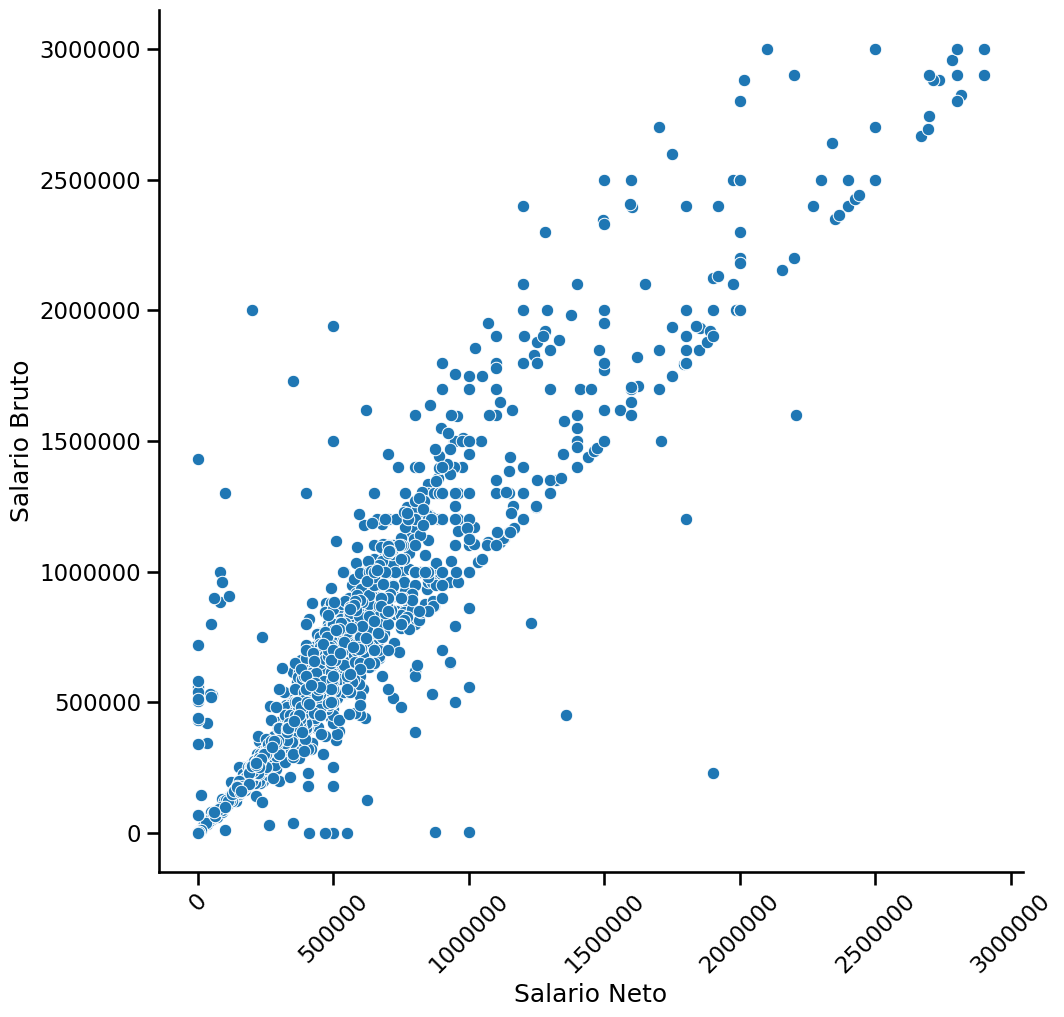

In [179]:
fig = plt.figure(figsize=(5,5))

seaborn.pairplot(data=filtered_df_no_nan, y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=1, height=10)

plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)

plt.title("")
plt.xlabel("Salario Neto")
plt.ylabel("Salario Bruto")







Se observa una tendencia lineal entre ambas variables, lo cual tiene sentido por como se definen. A continuación calculamos la matriz de correlaciones para ambas variables.

In [75]:
#matcov=numpy.cov(filtered_df_no_nan.salary_monthly_BRUTO,filtered_df_no_nan.salary_monthly_NETO)
#print('matriz de varianza covarianza:','\n',matcov,'\n')

corr=numpy.corrcoef(filtered_df_no_nan.salary_monthly_BRUTO,filtered_df_no_nan.salary_monthly_NETO)
print('matriz de correlaciones: \n ', corr,'\n')

print('correlación entra ambas variables, data frame limpio: ',corr[0,1],'\n')

matriz de correlaciones: 
  [[1.         0.91778131]
 [0.91778131 1.        ]] 

correlación entra ambas variables, data frame limpio:  0.9177813098678491 



Como la correlación entre ambas variables nos dió proxima a 1 (~ 0.92), podemos decir que las variables están correlacionadas. Para calcular el valor anterior se utilizaron las columnas de salario neto y bruto previamente filtradas, eliminando posibles NaN y outliers. A continuación se calculó la matriz de correlación con las columnas salario neto y bruto sin filtrar los outliers (si se filtraron posibles NaN).

In [76]:
corr=numpy.corrcoef(df.dropna().salary_monthly_BRUTO,df.dropna().salary_monthly_NETO)
print('matriz de correlaciones: \n ', corr,'\n')

print('correlación entra ambas variables, data frame sin NaN: ',corr[0,1],'\n')

matriz de correlaciones: 
  [[1.         0.62710102]
 [0.62710102 1.        ]] 

correlación entra ambas variables, data frame sin NaN:  0.6271010238891884 



Vemos que la correlación entre ambas variables decae a ~0.63.

## c) Densidad condicional

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






A continuación definiremos subpoblaciones a apartir de la columna "niveles de estudio". Definimos en tres subpoblaciones: secundario, grado y posgrado.

In [77]:
#Cuales son las distintas respuestas con respecto a nivel de estudio
# Check studies levels
filtered_df_no_nan = filtered_df_no_nan.dropna(subset=['profile_studies_level'])
studies_level = filtered_df_no_nan.profile_studies_level.unique()
studies_level

array(['Maestría', 'Universitario', 'Terciario',
       'Posgrado/Especialización', 'Secundario', 'Doctorado',
       'Posdoctorado'], dtype=object)

In [78]:
#cantidad de personas por nivel de estudio
# Subpopulation count
subpopulations = filtered_df_no_nan['profile_studies_level'].value_counts()
subpopulations

profile_studies_level
Universitario               1599
Terciario                    407
Posgrado/Especialización     143
Secundario                   106
Maestría                     105
Doctorado                     22
Posdoctorado                   8
Name: count, dtype: int64

In [79]:
subp_universitario = filtered_df_no_nan[(filtered_df_no_nan['profile_studies_level'] == 'Universitario') | (filtered_df_no_nan['profile_studies_level'] == 'Terciario')]
subp_posgrado = filtered_df_no_nan[(filtered_df_no_nan['profile_studies_level'] == 'Posgrado/Especialización') | (filtered_df_no_nan['profile_studies_level'] == 'Maestría')| (filtered_df_no_nan['profile_studies_level'] == 'Posdoctorado')| (filtered_df_no_nan['profile_studies_level'] == 'Doctorado')]
subp_secundario = filtered_df_no_nan[(filtered_df_no_nan['profile_studies_level'] == 'Secundario')]

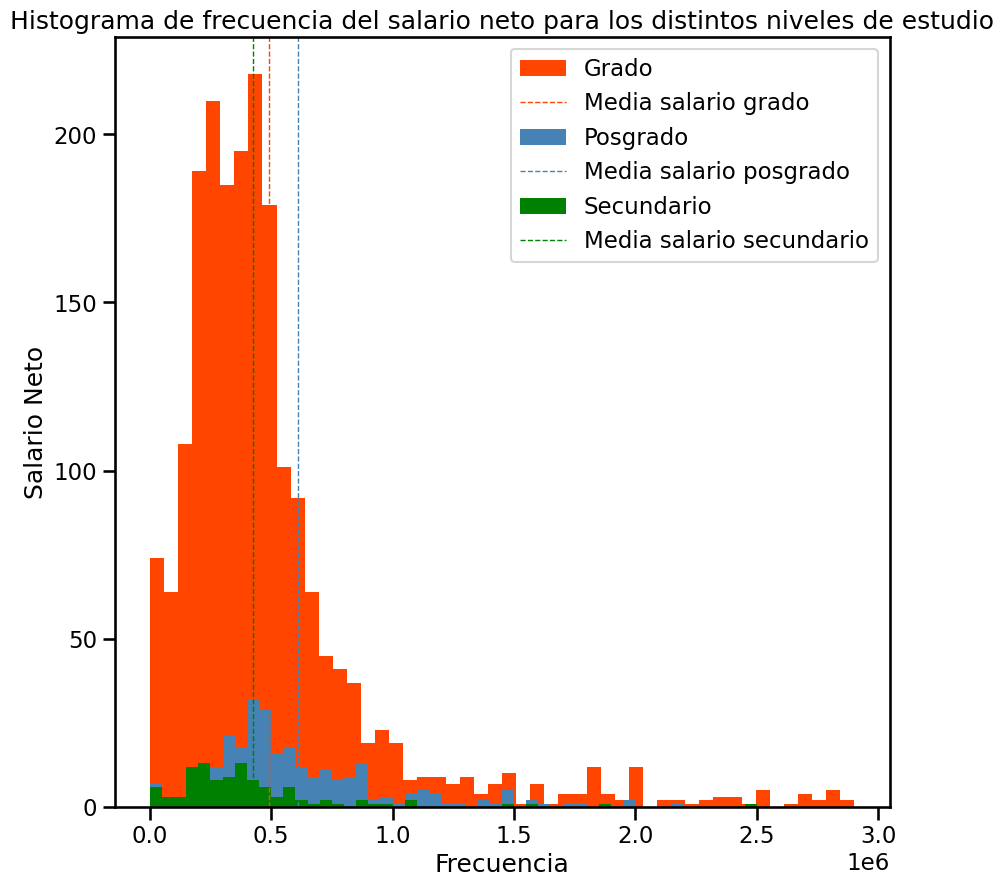

In [177]:
plt.figure(figsize=(10, 10))

plt.hist(subp_universitario['salary_monthly_NETO'], color='orangered', bins=50, label= "Grado")
plt.axvline(subp_universitario['salary_monthly_NETO'].mean(), color='orangered', linestyle='dashed', linewidth=1, label = "Media salario grado")

plt.hist(subp_posgrado['salary_monthly_NETO'], color='steelblue', bins=50, label= "Posgrado")
plt.axvline(subp_posgrado['salary_monthly_NETO'].mean(), color='steelblue', linestyle='dashed', linewidth=1, label = "Media salario posgrado")

plt.hist(subp_secundario['salary_monthly_NETO'], color='green', bins=50, label= "Secundario")
plt.axvline(subp_secundario['salary_monthly_NETO'].mean(), color='green', linestyle='dashed', linewidth=1, label = "Media salario secundario")

plt.title("Histograma de frecuencia del salario neto para los distintos niveles de estudio")
plt.xlabel("Frecuencia")
plt.ylabel("Salario Neto")

plt.legend()

plt.show()

Se observa que la media de salario correspondiente a la subpoblación "posgrado" es mayor a las otras dos. Nos permite pensar que al tener un nivel de estudio mayor, los salarios serán un poco mas elevados.

In [ ]:
#NORMALIZAMOS
#plt.hist(subp_universitario['salary_monthly_NETO'], density = True, color='orangered', bins=50)
#plt.hist(subp_posgrado['salary_monthly_NETO'], density = True, color='steelblue', bins=50)
#plt.hist(subp_secundario['salary_monthly_NETO'], density = True, color='green', bins=50)
#plt.show()

# Queremos ver si la variable categórica "nivel de estudio" es independiente respecto de la varaiable "Salario Neto".

Para ello vamos a calcular la probabilidad condicional.

In [165]:
#Calculamos  la media del salario NETO
avg_salary = filtered_df_no_nan['salary_monthly_NETO'].mean()
print ("Salario promedio =", avg_salary)

Salario promedio 503476.0960108786


In [166]:
#Probabilidad de cobrar mas de la media
prob_above_avg = len(filtered_df_no_nan[filtered_df_no_nan['salary_monthly_NETO'] >= avg_salary]) / len(filtered_df_no_nan) #consideramos: "cobrar más"<-> cobrar más que el promedio
print ("Probabilidad de cobrar mayor al salario promedio =", prob_above_avg)

Probabilidad de cobrar mayor al salario promedio = 0.3297071129707113


In [167]:
is_above_avg = filtered_df_no_nan['salary_monthly_NETO'] > avg_salary #lista de booleanos, prob de tener sueldo arriba del promedio


#lista de booleanos, dado la que dentro del grupo de posgrado cobran mas que la media
condi_1_posgrado = filtered_df_no_nan['profile_studies_level'] == 'Posgrado/Especialización'
condi_2_posgrado = filtered_df_no_nan['profile_studies_level'] == 'Maestría'
condi_3_posgrado = filtered_df_no_nan['profile_studies_level'] == 'Posdoctorado'
condi_4_posgrado = filtered_df_no_nan['profile_studies_level'] == 'Doctorado'
#condi_5_posgrado = filtered_df_no_nan['salary_monthly_NETO'] > avg_salary

posgrado_above_avg = condi_1_posgrado | condi_2_posgrado | condi_3_posgrado | condi_4_posgrado #& condi_5_posgrado

intersection_posgrado_count = len(filtered_df_no_nan[is_above_avg & posgrado_above_avg ])
posgrado_above_avg_count=len(filtered_df_no_nan[posgrado_above_avg])

#intersection_count
#probabilidad de tener un sueldo arriba del promedio su tengo experiencia mayor a 5
prob_cond_above_avg_dada_posgrado = intersection_posgrado_count/posgrado_above_avg_count #defino la probabilidad condicionada

print ("Probabilidad de cobrar mayor al salario promedio teniendo un título de posgrado =", prob_cond_above_avg_dada_posgrado) #para que me la muestre en pantalla


Probabilidad de cobrar mayor al salario promedio teniendo un título de posgrado = 0.4856115107913669


Como la probabilidad condicional de tener un salario mayor que la media teniendo un titulo de posgrado (~ 0.485) es mayor que la probabilidad de tener un salario mayor a la media (~ 0.329), las variables salario neto y nivel de estudio NO son independientes.

Concluimos que es mas probable obtener un salario mayor a la media si se cuenta con un título de posgrado.

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica.
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


Se seleccionaron como varaibles númericas el salario neto y los años de experiencia. Como variable categórica se seleccionó el nivel de estudio de lxs encuentadxs.

A continuación se observa la dispersión del salario neto, según los años de experiencia, considerando el nivel de estudio.

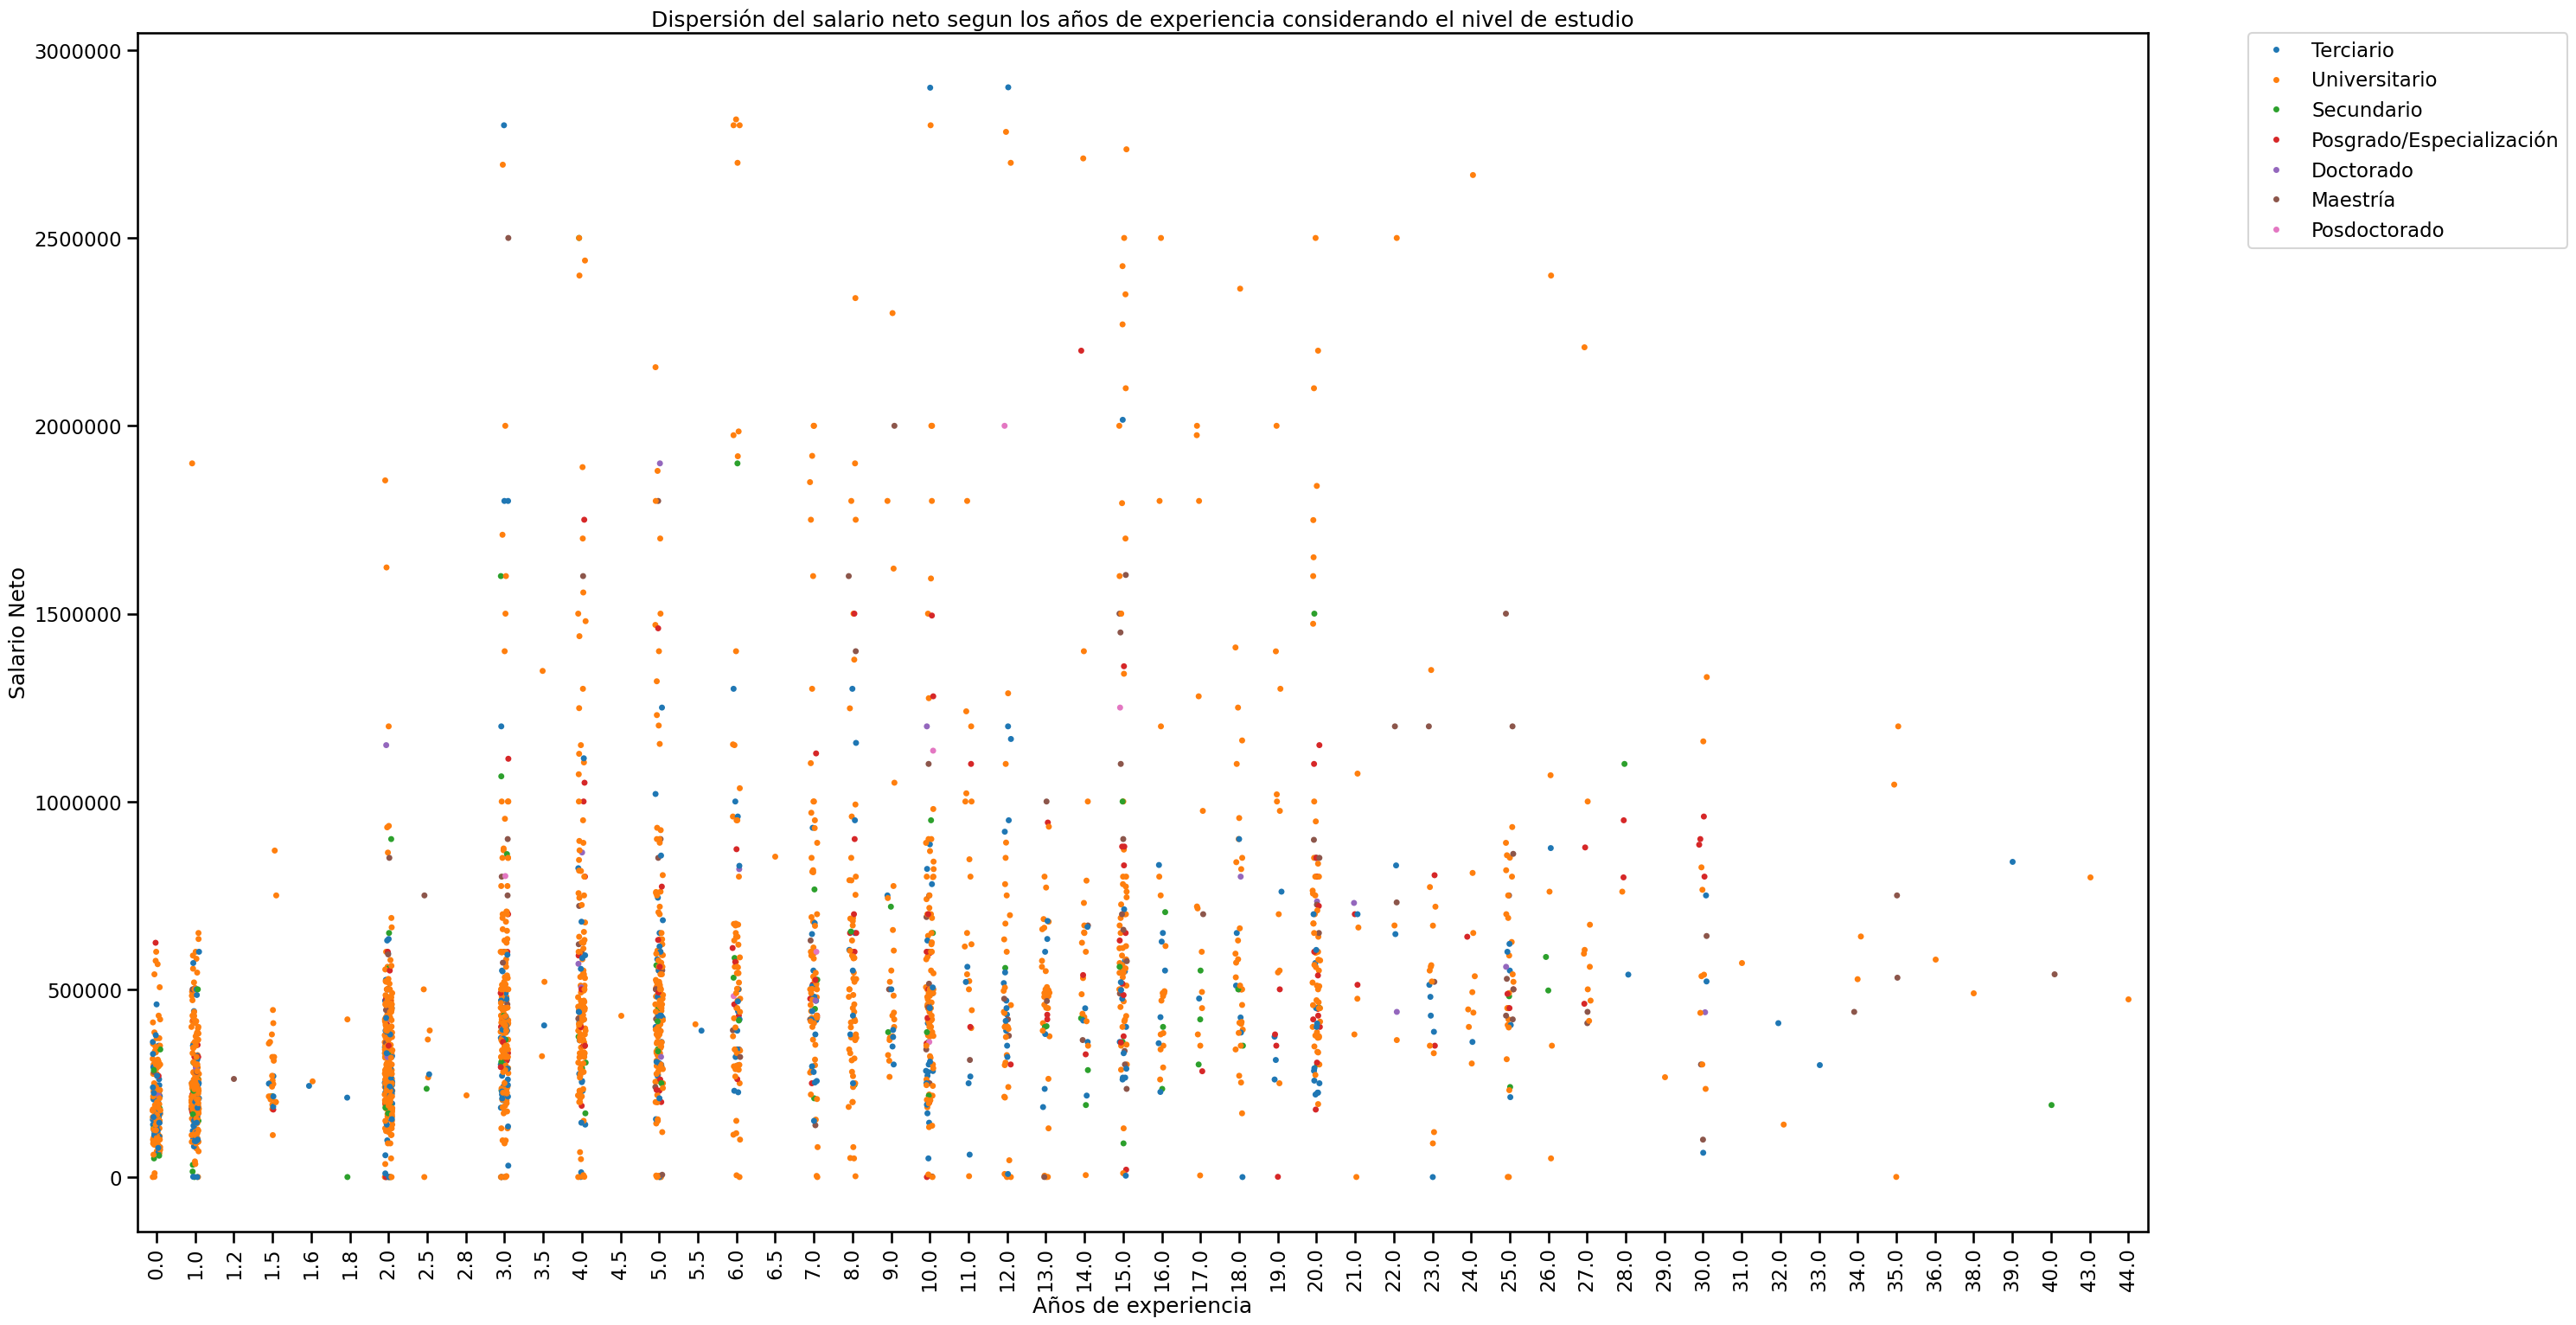

In [162]:
plt.figure(figsize=(30, 18))

seaborn.stripplot(data = filtered_df_no_nan, x ='profile_years_experience', y ='salary_monthly_NETO', hue ='profile_studies_level')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)

plt.title("Dispersión del salario neto segun los años de experiencia considerando el nivel de estudio")
plt.xlabel("Años de experiencia")
plt.ylabel("Salario Neto")

plt.show()